# Tools to read llc global model (13 tiles)

In [1]:
import numpy as np
from MITgcmutils import mds,llc
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
def plot_tiles(data, tsz):
    #### Initiate ####
    iid = [4,3,2,4,3,2,1,1,1,1,0,0,0]
    jid = [0,0,0,1,1,1,1,2,3,4,2,3,4]
    tid = 0
    #### plot ####
    fig = plt.figure(figsize=(10,10))
    gs = GridSpec(5, 5, wspace=.05, hspace=.05)
    for i in range(len(iid)):
        ax = fig.add_subplot(gs[iid[i],jid[i]])
        if i>=7:
            ax.imshow(data[tid:tid+tsz].T,origin='lower')
        else:
            ax.imshow(data[tid:tid+tsz],origin='lower')
        tid += tsz
        ax.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
    plt.show()

## I. Using MITgcm utils

### a. Read raw stacked matrix (exemple on tracer pickup file)

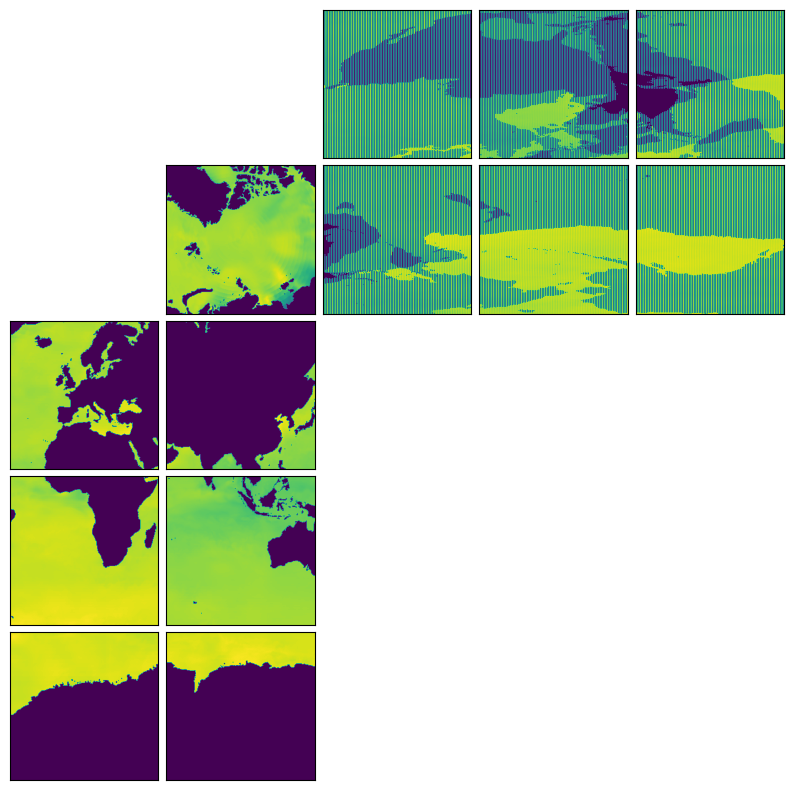

In [3]:
# Read pickup file 
data_raw = mds.rdmds("pickup_ptracers", itrs=1)
# plot
plot_tiles(data_raw[0,0], 270)

### b. Convert into a map (flatten)

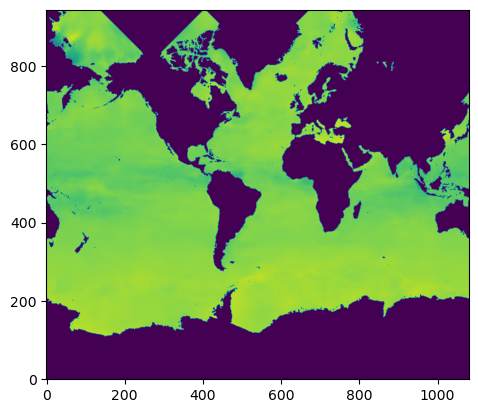

In [4]:
data = llc.flat(data_raw)
plt.imshow(data[0,0],origin='lower')

## I. Using personal code

### a. Read the llc file

In [5]:
def decode_llc(fname, nTr):
    ########################################
    # Set llc270 grid basic dimensions     :
    ########################################
    nX=270; nY=nX*13; nZ=50
    ########################################
    # Read binary file :
    ########################################
    with open(fname, 'rb') as fid:
        tmp = np.fromfile(fid, '>f8')
    fld = tmp.reshape((nTr,nZ,nY,nX))
    return(fld)

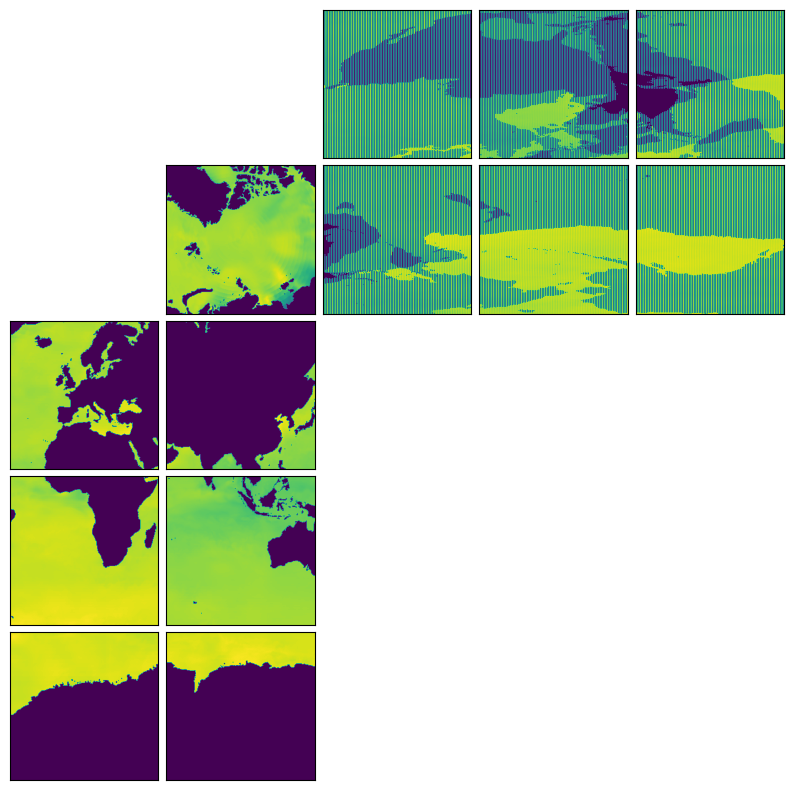

In [6]:
# Read pickup file 
data_raw = decode_llc("pickup_ptracers.0000000001.data", 31)
# plot
plot_tiles(data_raw[0,0], 270)

### a. Transpose tiles 8 to 13

In [9]:
def transp_tiles(data):
    nx = data.shape[1]
    ny = data.shape[0]
    
    tmp = data[7*nx:,::-1]
    transpo = np.concatenate((tmp[2::3,:].transpose(),tmp[1::3,:].transpose(),tmp[0::3,:].transpose()))
    data_out = np.concatenate((data[:7*nx],np.flipud(transpo[:,:nx]),np.flipud(transpo[:,nx:])))
    return data_out

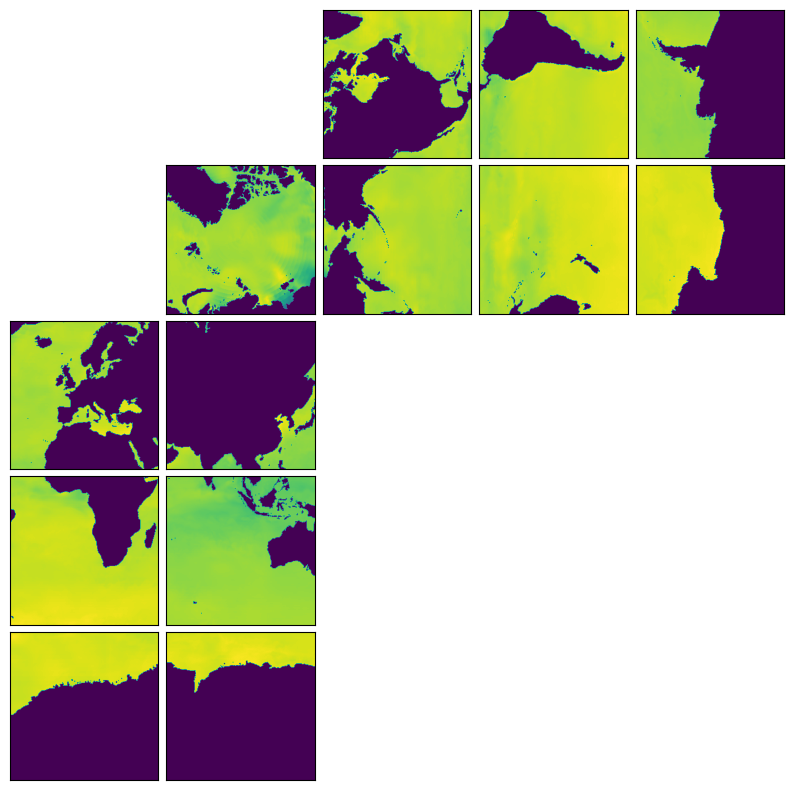

In [10]:
# transpose the ;atric tiles 8 to 13
data2d = transp_tiles(data_raw[0,0])
# plot
plot_tiles(data2d, 270)